# Zero to Hero

Bibliografia

data.table in R – The Complete Beginners Guide in https://www.machinelearningplus.com/

https://cran.r-project.org/web/packages/data.table

https://s3.amazonaws.com/assets.datacamp.com/img/blog/data+table+cheat+sheet.pdf

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [63]:
options(warn=-1)
#install.packages("tidyverse", dependencies = TRUE)
#install.packages("readr")
#install.packages("png")
#install.packages("imager")
#install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [56]:
setwd("C:\\Users\\oliva\\OneDrive\\Desktop\\DS\\Austral\\08 - Labo1\\labo\\src\\zero2hero")

In [64]:
library("data.table") #cargo la libreria  data.table
library("readr") #cargo la libreria readr
library("png")
library("imager")
library("ggplot2")

"https://storage.googleapis.com/austral2022r/paquete_premium_202011.csv" está en el repositorio de la asignatura

The way you work with data.tables is quite different from how you’d work with data.frames. Let’s understand these difference first while you gain mastery over this fantastic package. The fread(), short for fast read is data.tables version of read.csv(). Like read.csv() it works for a file in your local computer as well as file hosted on the internet.

In [11]:
dataset <- fread("https://storage.googleapis.com/austral2022r/paquete_premium_202011.csv")
class(dataset)

[1] "data.table" "data.frame"

In [12]:
#En caso de que se encuentre en formato data.frame, es posible pasarlo a data.table:
dataframe <- read_csv("https://storage.googleapis.com/austral2022r/paquete_premium_202011.csv")
setDT(dataframe)
class(dataframe)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  clase_ternaria = col_character()
)
i Use `spec()` for the full column specifications.



[1] "data.table" "data.frame"

Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están bajando 117MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [13]:
nrow(dataset)
ncol(dataset)

[1] 159388

[1] 159

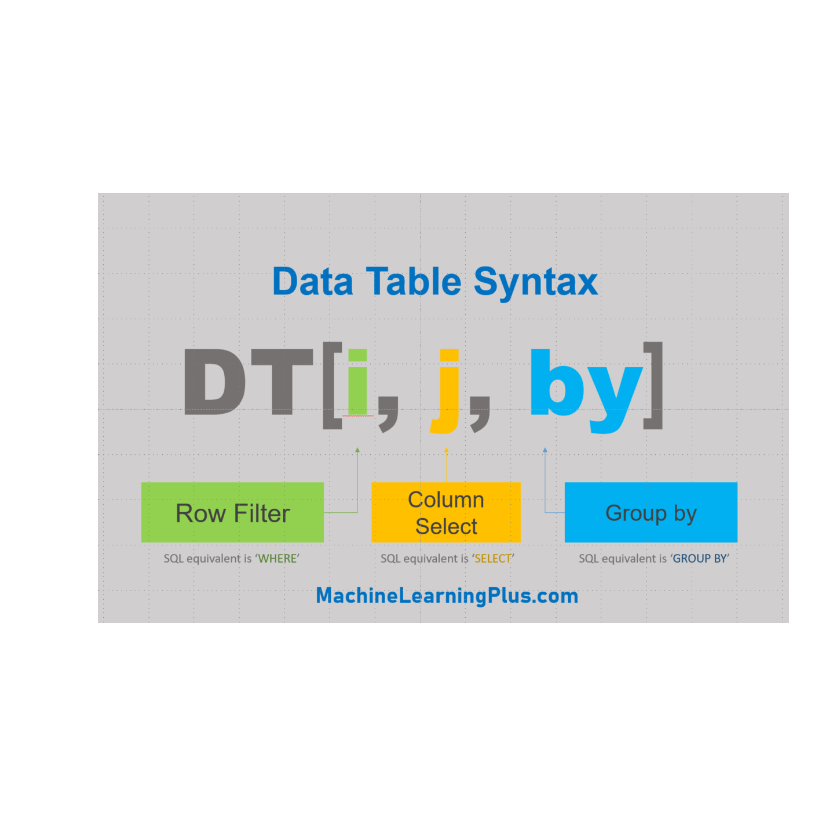

In [17]:
im <- load.image("https://www.machinelearningplus.com/wp-content/uploads/2019/11/data_table_syntax.png")
plot(im, axes = F)

## Filtrado con data.table

The main difference with data.frame is: data.table is aware of its column names. So while filtering, passing only the columns names inside the square brackets is sufficient.
Es decir, las buenas practicas recomiendan filtrar usando nombres de columnas y no posiciones/indices numericos

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda posición del dataset[ 1, 2, 3 ]

In [18]:
dataset[, .N]

[1] 159388

In [30]:
#Se recomienda usar la sintaxis .(col1, col2, col3) pero puede usarse list(col1, col2, col3)
dataset[1:5, .(cliente_edad, cliente_antiguedad, mrentabilidad)] # ejemplo de filtrado. 

cliente_edad,cliente_antiguedad,mrentabilidad
53,35,1576.59
44,23,1771.25
64,139,3133.43
59,253,9579.53
52,130,1282.12


Exploración de clase_ternaria.

In [6]:
dataset[, .N, clase_ternaria] # Toma todas las columnas, agrupa por clase_ternaria y ofrece recuento (N)

clase_ternaria,N
CONTINUA,158229
BAJA+1,511
BAJA+2,648


###  Varias formas de contar los BAJA+2

Distintas sintaxis que arrojan mismo resultado

In [35]:
nrow(dataset[clase_ternaria == "BAJA+2"])

[1] 648

In [38]:
dataset[, sum(clase_ternaria=="BAJA+2")]

[1] 648

#### Sintaxis recomendada

WHERE clase_ternaria=="BAJA+2" 

Queda explicito la equuivalencia entre el primer argumento del filtrado con la clausula where de SQL

##### .N
Pero... ¿que hace N? .N is a special built-in variable that holds the number of observations in the current group. 
It is particularly useful when combined with by. 
In the absence of group by operations, it simply returns the number of rows in the subset.

In [37]:
dataset[clase_ternaria == "BAJA+2", .N] # el autentico estilo data.table, where baja+2, .N para contar numero de filas

[1] 648

#### Conteo de proporcion de BAJA+2 en el dataset

In [44]:
dataset[, sum(clase_ternaria == "BAJA+2") / .N] # obtiene la proporcion sumando y diviendo por el total de filas

[1] 0.004065551

#### Conteo de la proporcion de BAJA+2 en un predicado

In [45]:
dataset[ctrx_quarter < 20, sum(clase_ternaria == "BAJA+2") / .N] # proporcion de baja+2 en clientes que realizaron menos de 20 movimientos en los ultimos 90 dias

[1] 0.02610297

### Ganancias del dataset - Nueva columna

Agregando columnas: You can always create a new column as you do with a data.frame, but, data.table lets you create column from within square brackets. This saves key strokes. Se debe usar el simbolo ":=".

Creo la columna ganancia y la populo con el valor de -1000
<br>

In [47]:
dataset[, ganancia := -1000] # crea columna, asigna -1000

Se asigna 59000 a los registros que cumplen con la condicion clase_ternaria=BAJA+2

In [49]:
dataset[clase_ternaria == "BAJA+2", ganancia := 59000] #WHERE clase_ternaria == baja+2, entonces asignar 59000 en columna ganancia

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [54]:
dataset[, sum(ganancia)] #suma los valores de la columan, para todas las filas

[1] -120508000

Conclusion: Si le enviara estímulo a todos, se **pierden**  120.5 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple *ctrx_quarter < 20*

In [58]:
dataset[ctrx_quarter < 10, sum(ganancia)]

[1] 6104000

Ahora  la ganancia de  *ctrx_quarter < 4*

In [59]:
dataset[ctrx_quarter < 4, sum(ganancia)]

[1] 4548000

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de ctrx_quarter 
<br>
Ya resolveremos esto en forma inteligente más adelante

In [60]:
for(transacciones in  0:50)
{
   cat(transacciones, dataset[ctrx_quarter < transacciones, sum(ganancia)], "\n")    
}

0 0 
1 3252000 
2 3857000 
3 4149000 
4 4548000 
5 4842000 
6 5234000 
7 5640000 
8 5713000 
9 6016000 
10 6104000 
11 6506000 
12 6576000 
13 6738000 
14 6632000 
15 6493000 
16 6257000 
17 6199000 
18 6667000 
19 6880000 
20 7071000 
21 6949000 
22 6588000 
23 6605000 
24 6384000 
25 6447000 
26 6191000 
27 6059000 
28 5724000 
29 5377000 
30 5229000 
31 5016000 
32 4697000 
33 4105000 
34 3677000 
35 3153000 
36 2604000 
37 2081000 
38 1499000 
39 836000 
40 579000 
41 134000 
42 -615000 
43 -1119000 
44 -1748000 
45 -2503000 
46 -3157000 
47 -3804000 
48 -4546000 
49 -5208000 
50 -5687000 


Observo que el predicado ctrx_quarter < 20 tiene la máxima ganancia

### Ganancias de predicado complejo

In [61]:
dataset[ctrx_quarter < 20 & mpasivos_margen < 29.8 , sum(ganancia)]

[1] 7179000

¡Enhorabuena! hemos alcanzado los 7.18 M de ganancia

### Gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

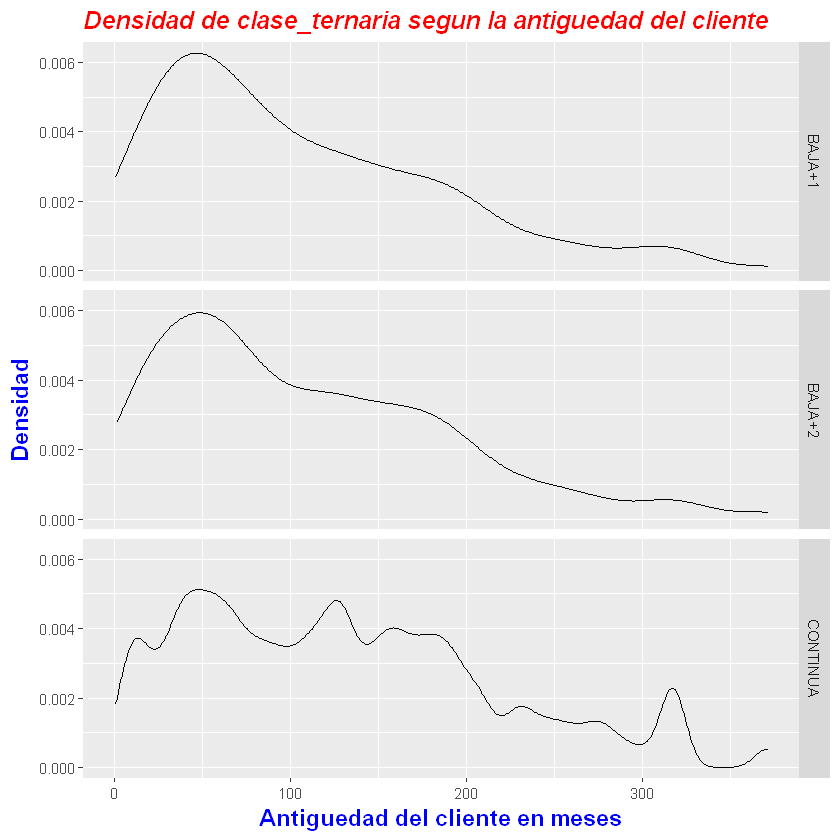

In [73]:
campo <- "cliente_antiguedad" 
dataset %>%
ggplot(aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .") +
labs(title = "Densidad de clase_ternaria segun la antiguedad del cliente", x = "Antiguedad del cliente en meses", y = "Densidad") +
theme(
plot.title = element_text(color = "red", size = 15, face = "bold.italic"),
axis.title.x = element_text(color = "blue", size = 14, face = "bold"),
axis.title.y = element_text(color = "blue", size = 14, face = "bold")
)

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [74]:
options(repr.plot.width=15, repr.plot.height=15)

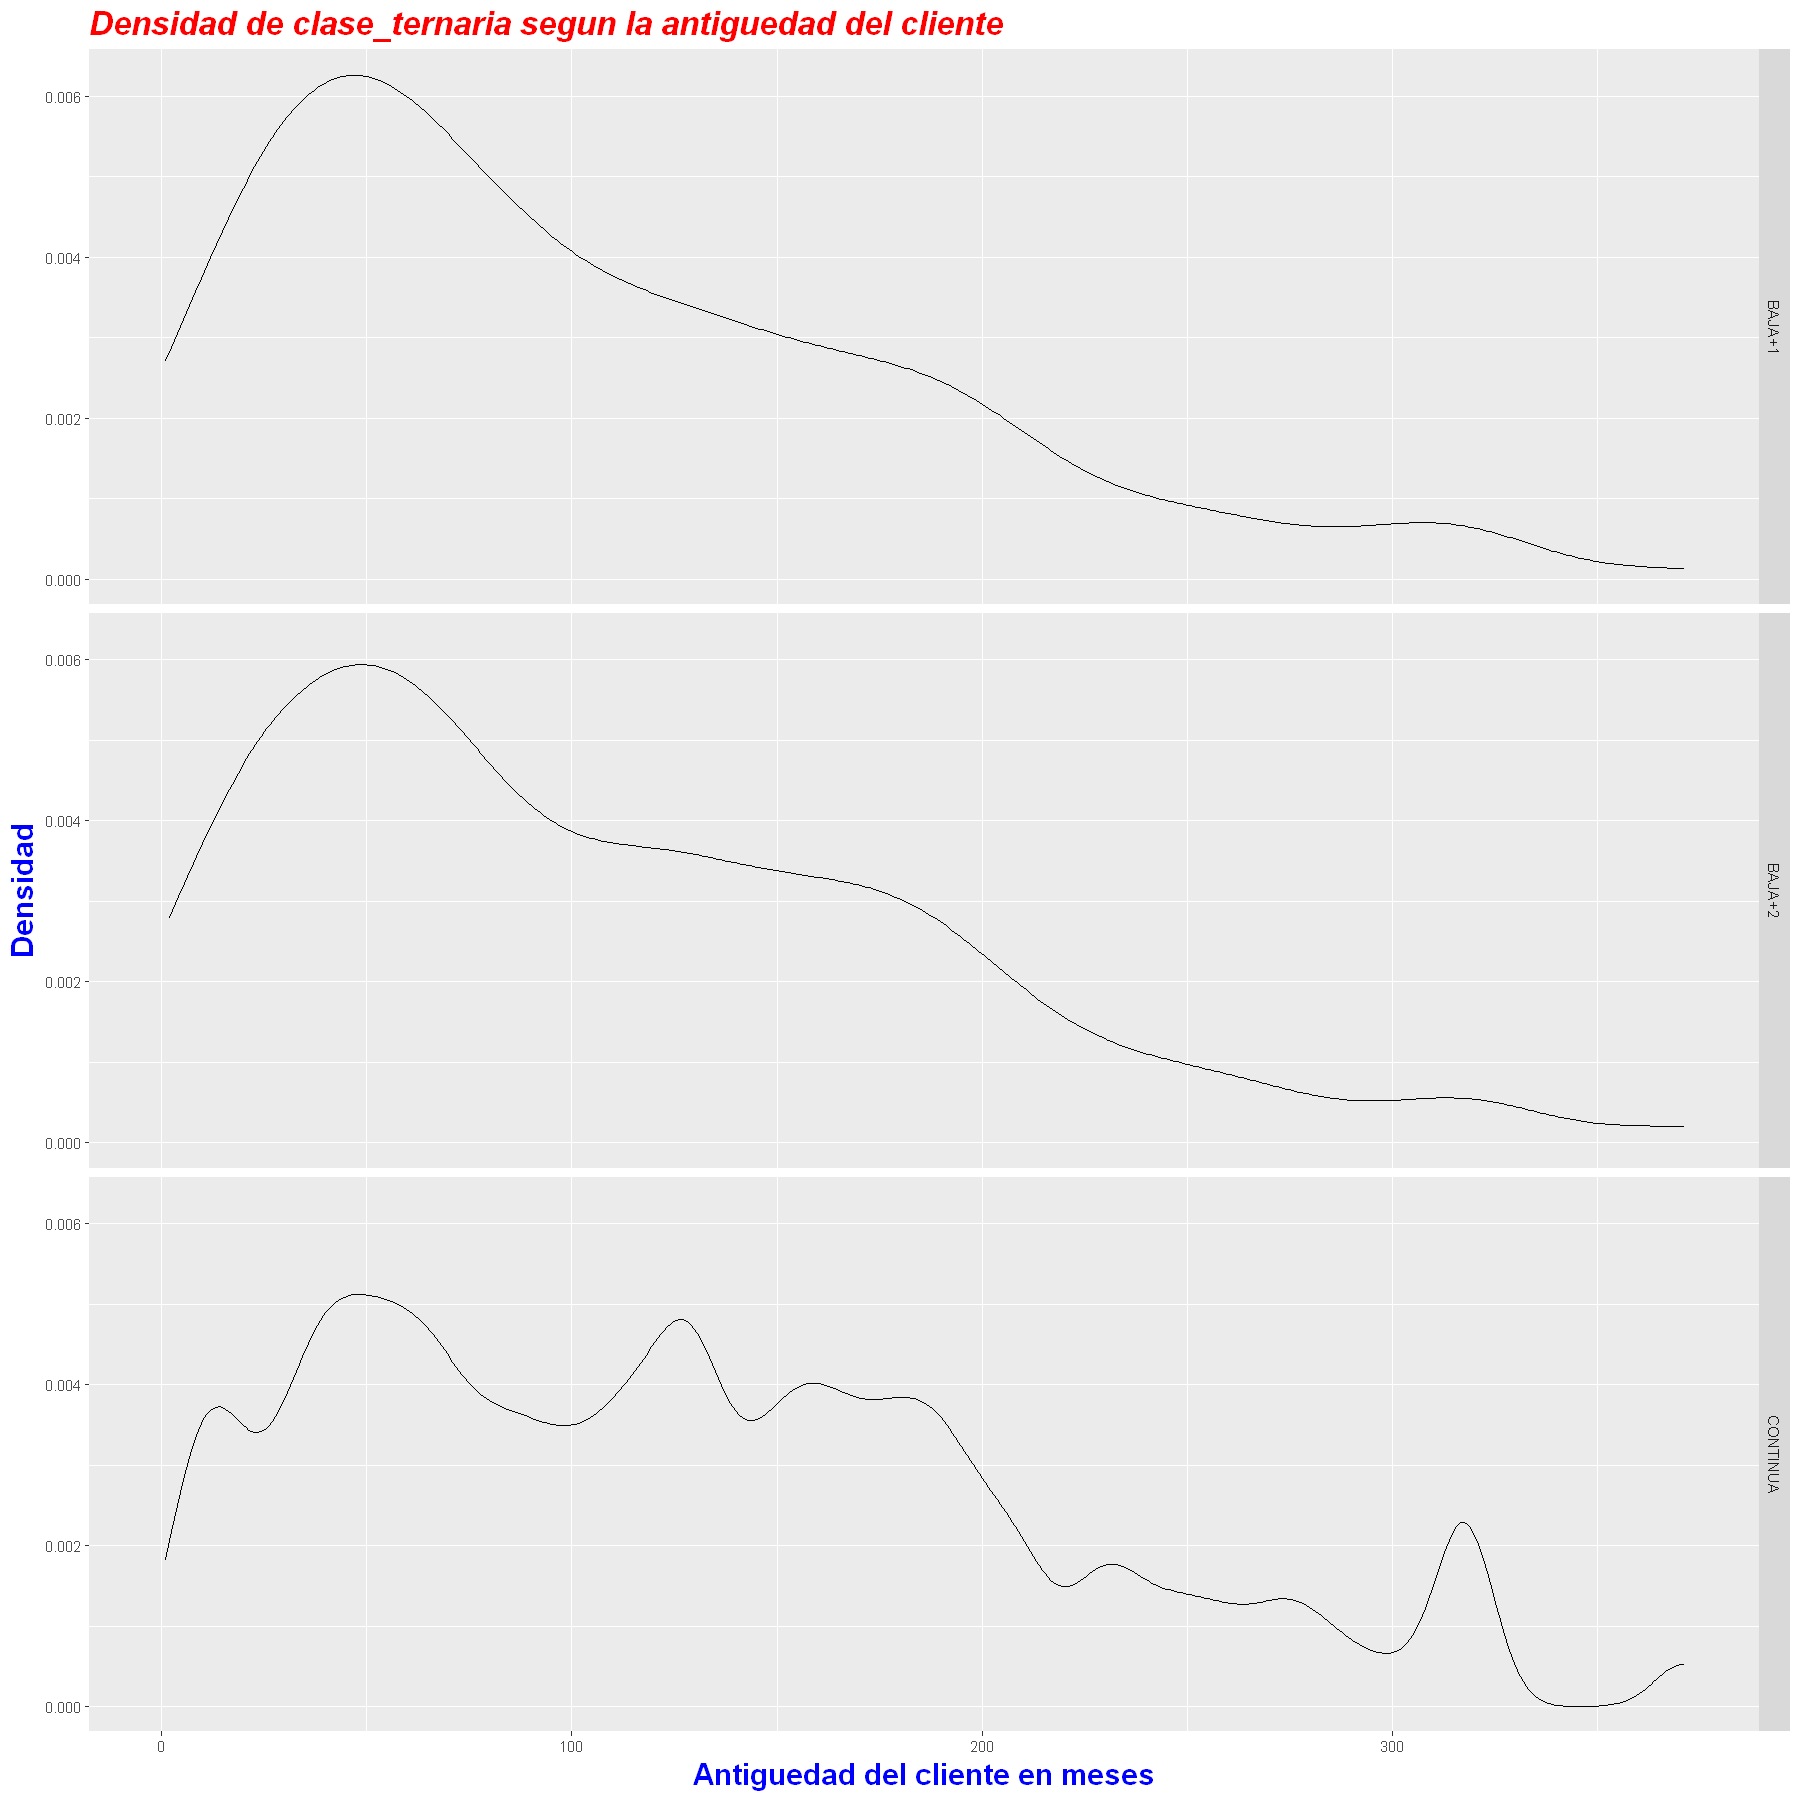

In [77]:
campo <- "cliente_antiguedad" 
dataset %>%
ggplot(aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .") +
labs(title = "Densidad de clase_ternaria segun la antiguedad del cliente", x = "Antiguedad del cliente en meses", y = "Densidad") +
theme(
plot.title = element_text(color = "red", size = 20, face = "bold.italic"),
axis.title.x = element_text(color = "blue", size = 18, face = "bold"),
axis.title.y = element_text(color = "blue", size = 18, face = "bold")
)